## Q-1 : PCA 

*   Akshay Bankar (2019201011)

### PCA as dimensionality reduction technique:
To reduce the data dimensionality we should be able to summarize the data with less characteristics (features). PCA does this by taking the linear combination of the existing features and constructs some new features that are good alternative representation of the original data.

PCA tries to pick the best d direction, referred to as principal components and projects the points onto these directions.

### How does PCA do this : 
There are twi ways to formulate such projection. 
First, look for some features that strongly differ across data points, thus, PCA looks for features that captures as much variation across data points as possible. 
Second, that we are looking for the features that would allow us to "reconstruct" the original features.
![alt text](https://drive.google.com/uc?id=1OmgedUGXktvKisMnN-gwQAJjOzapFt-5)
From the follwing figure it can be seen that these two objectives are same. It is equivalent to either maximize remaining variance or minimize lost variance to find the principal components.
![alt text](https://drive.google.com/uc?id=1H9WpCspKQu7AeTMnu_3vNn5J3qKtOk_4)


In [1]:
import numpy as np
from sklearn.decomposition import PCA
import cv2
import glob

### PCA formulation :
given X, the centered data matrix, the projection, Xw (dot product between the data point, X and the projection weight, w), its variance can be computed as follows:
\begin{align}
\frac{1}{n-1}(\mathbf{Xw})^\top \mathbf{Xw} = \mathbf w^\top (\frac{1}{n-1}\mathbf X^\top\mathbf X) \mathbf w = \mathbf w^\top \mathbf{Cw}
\end{align}

Where C is the covariance matrix of the data X. The covariance matrix is a d×d matrix (d is the total number of dimensions, features) where each element represents the covariance between two features. The covariance between two features x_j and x_k is calculated as follows:

\begin{align}
\sigma_{jk} = \frac{1}{n-1} \sum_{i=1}^{n} \left( x_{ij} - \bar{x}_j \right) \left( x_{ik} - \bar{x}_k \right)
\end{align}

\begin{align} \bar{x}_j \end{align}  is the mean of vector (feature) \begin{align}\bar{x}_j = \sum \limits_{i=1}^n x_{ij}\end{align}

The covariance matris is then,
\begin{align}
\mathbf{C} = \frac{1}{n-1} X^\top X
\end{align}

Now the objective function for PCA is 
\begin{align}
&  \underset{\mathbf{w}}{\text{maximize}}
&& \mathbf w^\top \mathbf{Cw} \nonumber \\
&  \text{subject to}
&& \mathbf w^\top \mathbf w=1
\end{align}
This objective function can be solved by the Lagrange multiplier, minimizing the loss function:
\begin{align}
\frac{\partial L}{\partial \mathbf w} 
& = \mathbf{Cw} - \lambda \mathbf w = 0 \\
& = \mathbf{Cw} = \lambda \mathbf w
\end{align}
After solving the equation above, we'll obtain eigenvector and eigenvalue pairs, where every eigenvector has a corresponding eigenvalue. An eigenvector is essentially the direction of each principal component and the eigenvalue is a number telling us how much variance there is in the data in that direction, in other words, how spread out the data is on the line.



> Load the dataset


In [2]:
img_files = glob.glob('dataset/*')

> Read the color image file.

> Resize the image to size (64,64)

> Convert image to gray scale

> Flatten the data to obtain row vectors


In [82]:
gray_images = []
labels = []
for file in img_files:
    img = cv2.imread(file)
    img = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA) #None,fx=0.5,fy=0.5
    flat_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).flatten()
    gray_images.append(flat_img)



> Standardize the data



In [84]:
n_features = np.shape(gray_images[0])[0]
#print(n_features)
std_dev = np.zeros(np.shape(gray_images))
print(std_dev.shape)
gray_images = np.asarray(gray_images)
for i in range(n_features):
     std_dev[:,i] =  (gray_images[:,i] - np.mean(gray_images[:,i]))/gray_images[:,i].std()

(520, 4096)




> Obtain the covariance matrix



In [85]:
#print(np.shape(gray_images))
# Covariance
#np.set_printoptions(precision=3)
cov = np.cov(std_dev.T)# Eigen Values



> Obtain the Eigenvectors and Eigenvalues from the covariance matrix



In [86]:
from scipy.linalg import eigh
EigVal,EigVec = eigh(cov)
#EigVal,EigVec = np.linalg.eig(cov)
#print("Eigenvalues:\n\n", EigVal,"\n")



> Sort eigenvalues and correspnding eigenvectors in descending order and compute the principal components



In [87]:
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(std_dev, EigVec)   #cross product



> Plot of graph which shows the ammount of information contained in each direction of eigenvectors



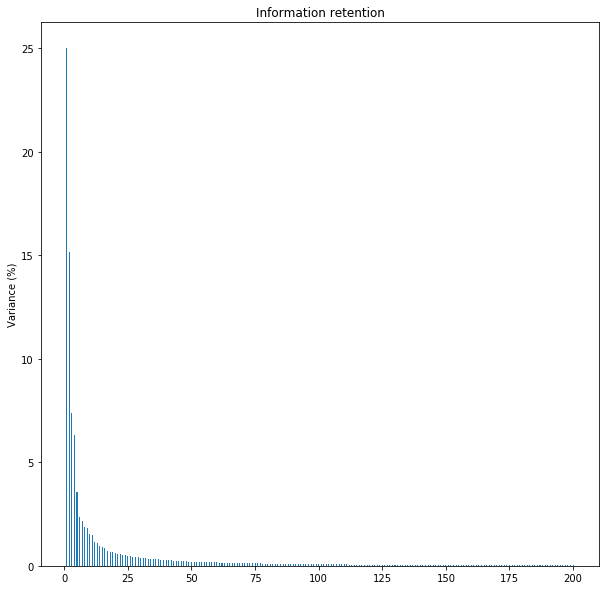

In [88]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid

plt.figure(figsize=(10,10))
plt.bar([i+1 for i in range(200)],EigVal[:200]/sum(EigVal)*100,align='center',width=0.4) #tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
plt.ylabel('Variance (%)')
plt.title('Information retention');

> Number of components that contain 80% of information

In [89]:
percent=0
count=0
thresh = 0.8
for i in EigVal:
    percent+= i/sum(EigVal)
    count+=1
    if percent > thresh:
        break;
print("Number of components that contain 80% of information :",count)

Number of components that contain 80% of information : 27


> Reconstruction image using these compnents containing 80% of information

(520, 27)


Text(0.5, 0, '27 components')

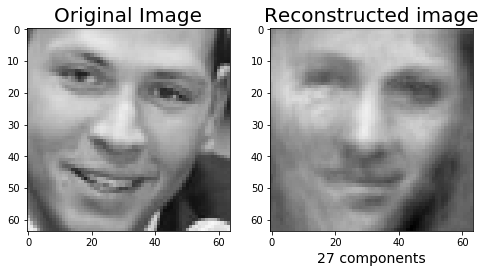

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(gray_images[0].reshape(64,64),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
#plt.xlabel('64x64 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

PC_img = np.matmul(gray_images, EigVec[:, :count])
print(PC_img.shape)
reconstructed_img = np.matmul(PC_img, EigVec[:, :count].T)
plt.subplot(1, 2, 2);
plt.imshow(reconstructed_img[0].reshape(64, 64),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Reconstructed image', fontsize = 20);
plt.xlabel('27 components', fontsize = 14)


> Plot to show total mean square error over all train images vs the number of
principal components

Number of components with 0.99 % of information : 320
Number of components with 0.95 % of information : 137
Number of components with 0.9 % of information : 71
Number of components with 0.85 % of information : 43
Number of components with 0.8 % of information : 27
Number of components with 0.75 % of information : 18
Number of components with 0.7 % of information : 13
Number of components with 0.6 % of information : 7
Number of components with 0.5 % of information : 4


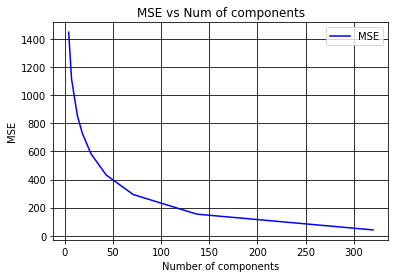

In [91]:
from sklearn.metrics import mean_squared_error

pca_comp = [0.99, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.60, 0.50]
n_comp = []
mse = []
for num in pca_comp:
    count = 0
    percent = 0
    for i in EigVal:
        percent+= i/sum(EigVal)
        count+=1
        if percent > num:
            break;
    n_comp.append(count)
    print("Number of components with", num, "% of information :",count)
    PC_img = np.matmul(gray_images, EigVec[:, :count])
    #print(PC_img.shape)
    reconstructed_img = np.matmul(PC_img, EigVec[:, :count].T)
    mse.append(mean_squared_error(gray_images, reconstructed_img))
    
plt.title("MSE vs Num of components")
plt.ylabel('MSE')
plt.xlabel('Number of components')

plt.plot(n_comp,mse,'b', label="MSE")
#plt.plot(k,manhatt_success,'g', label="Manhatt. succ. rate")
plt.legend()
plt.grid(True, color='k')
plt.show()

> 1D, 2D and 3D plots of the principal components

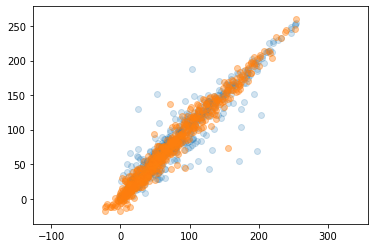

In [92]:
PC_img = np.matmul(gray_images, EigVec[:, :137])
reconstructed_img = np.matmul(PC_img, EigVec[:, :137].T)
plt.scatter(gray_images[:, 0], gray_images[:, 1], alpha=0.2)
plt.scatter(reconstructed_img[:, 0], reconstructed_img[:, 1], alpha=0.4)
plt.axis('equal');

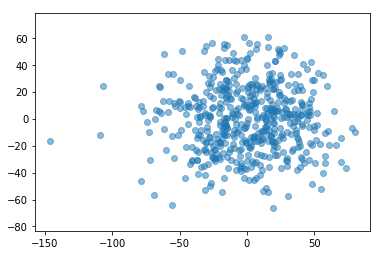

In [93]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(PC[:, 0], PC[:, 1], alpha = 0.5)

for length, vector in zip(EigVal[0:2], EigVec[:2,0:2]):
    v = vector * 3 * np.sqrt(length)
    #print(np.shape(np.mean(gray_images[:,:2], axis=0)))
    draw_vector(np.mean(gray_images[:,:2],axis=0), np.mean(gray_images[:,:2], axis=0) + v)
plt.axis('equal');


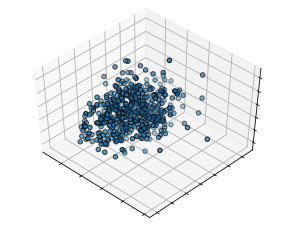

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.scatter(PC[:, 0], PC[:, 1], PC[:, 2], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()